# Organizations should move from frequentist approach of A/B testing towards the Bayesian framework

<p><b>The aim of this notebook is to demonstrate the advantages of Bayesian framework of experimentation over the frequentist framework</b></p>

######  <font color='brown'>Hypothetical Use Case:</font>  
Let's say LinkedIn wants to increase its conversion ratio when a customer clicks on “LinkedIn Premium” button. The underlying assumption is that the layout, information and other page factors are affecting the conversion ratio. Let’s call this current variant “A”. Thus, we want to run an A/B test comparing the performance of variant “A” with a different variant “B”.

###### Context: 
LinkedIn decides to conduct an experiment where, the site sends them to one of two (or possibly more) different pages when a user clicks on “LinkedIn premium” button. The purpose is to determine which page version generates a superior outcome, i.e. which page generates more number of conversions. Below represents the results and their interpretation from the two approaches. The note book is divided in **three parts**:

**1. Layout of steps taken in both Frequentist and Bayesian approach**

**2. Compare the results from both the approaches**

**3. Elaborate on the steps taken for both the approaches**

##### 1. Layout of steps taken in both Frequentist and Bayesian approach

###### 1.1 Steps taken in frequentist approach

1. Deciding on the effect size
2. Power calculations and sample size estimation
3. Collecting data for the decided time period
4. Measuring of results - Significant or not? 

###### 1.2 Steps taken in bayesian approach

**Some context:**\
We are interested in beliefs, which can be interpreted as probabilities by thinking Bayesian. We have a *prior* belief in event $A$, beliefs formed by previous information, e.g., our prior belief about what generally are the conversion rates before performing tests.

Secondly, we observe our evidence. If we observe $X$ conversions, we want to update our belief to incorporate this. We call this new belief the *posterior* probability. Updating our belief is done via the following equation, known as Bayes' Theorem, after its discoverer Thomas Bayes:

\begin{align}
  P( A | X ) = & \frac{ P(X | A) P(A) } {P(X) } \\\\[5pt]
 & \propto P(X | A) P(A)\;\; (\propto \text{is proportional to } )
 \end{align}
 
The above formula is not unique to Bayesian inference: it is a mathematical fact with uses outside Bayesian inference. Bayesian inference merely uses it to connect prior probabilities $P(A)$ with an updated posterior probabilities $P(A | X )$.

**So the steps taken are:**
1. Collect information about how the prior distribution looks like (not a necissity; we can use ininformed priors)
2. Deciding the decision boundary (for e.g. we want to 90% sure that version A is better than B)
3. Collecting the data
4. Calculating the posterior distribution for conversion rates of both the variants
5. Inference


###### 2. Comparing the results from both the approaches

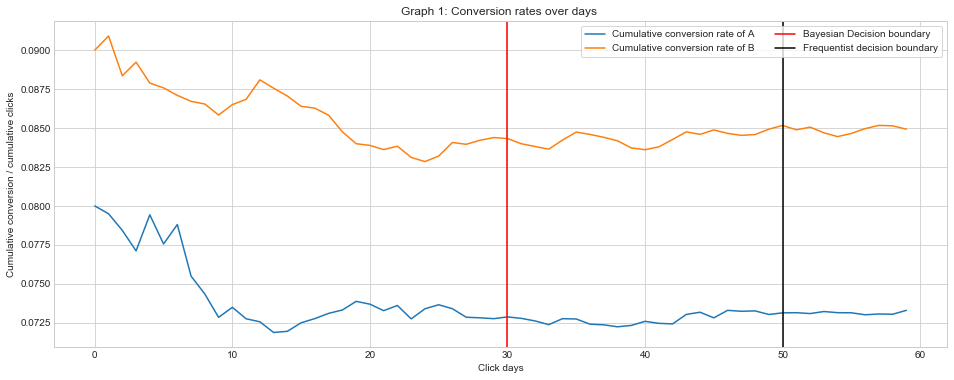

In [24]:
# Will be explaining the approach to results and dataframe used in next section of "Elaborate steps takes"
fig, ax = plt.subplots(figsize=(16,6))
plt.style.use('seaborn-whitegrid')
ax.plot(conv_days['click_day'], conv_days['cumu_rate_a'], label = 'Cumulative conversion rate of A')
ax.plot(conv_days['click_day'],conv_days['cumu_rate_b'], label = 'Cumulative conversion rate of B')
ax.set_title('Graph 1: Conversion rates over days ')
ax.set_ylabel('Cumulative conversion / cumulative clicks')
ax.set_xlabel('Click days')
legend = ax.legend(loc = 'upper right',ncol=1,frameon = True)

xcoords = [30, 50]
# colors for the lines
colors = ['r','k']
decision_boundary = ['Bayesian Decision boundary', 'Frequentist decision boundary']
for xc,c,db in zip(xcoords,colors,decision_boundary):
    ax.axvline(x=xc, label='{}'.format(db), c=c)
    ax.legend(loc = 'upper right',ncol=2,frameon = True)
    
plt.show()

###### 2.1 Frequentist results & interpretaion - what it means and what it doesn't: 
1. We get a p value of 0.02 with a confidence interval of __ and hence we can reject the null hypothesis 
2. This **does not** means that we can accept the alternate hypothesis as there is 98% chance that the version b is better
3. Well the results mean that there is 2% chance to observe this sample (conversions from variant B) as extreme as this
4. We can’t say anything about the probability of one variant being better than other.
5. Even the confidence interval doesn’t indicate the how probable these values are (i.e. edge values of the confidence interval does not mean that they are less probable than the middle values of the confidence interval)


Frequentist statistic's hypothesis testing uses a p-value to weigh the strength of the evidence (what the data is telling you about the population). p-value is defined as the probability of obtaining the observed or more extreme outcome, given that the null hypothesis is true (not the probability that the alternative hypthesis is true). It is a number between 0 and 1 and interpreted in the following way:

A small p-value (typically <= 0.05, 0.05 is a commonly used threshold, the threshold is often denoted as  α ) indicates strong evidence against the null hypothesis, so we reject the null hypothesis. This means that something interesting is going on and it’s not just noise!
A large p-value (> 0.05) indicates weak evidence against the null hypothesis, so we fail to reject the null hypothesis. Although p-value is still in our favor, we cannot conclusively say that it was not due to random noise.
p-values very close to the cutoff (0.05) are considered to be marginal (could go either way). If you carefully read good papers on these kind of topics, you will always see the p-values being reported so that the readers can draw their own conclusions.

A point estimate can give us a rough idea of a population parameter like the mean, but estimates are prone to error. A confidence interval is a range of values above and below a point estimate that captures the true population parameter at some predetermined confidence level. For example, if you want to have a 95% chance of capturing the true population parameter with a point estimate and a corresponding confidence interval, we'd set our confidence level to 95%. Higher confidence levels result in a wider confidence intervals

More formally, the definition of a 95% confidence interval means that 95% of confidence intervals, created based on random samples of the same size from the same population will contain the true population parameter.


###### 2.2 Bayesian results and its interpretation: 

1. Based on the data we have observed, we are 95% sure that version “B” is better than “A”. Credible interval is __
2. This gives the probability distribution of *difference in conversion rates* between the two variants
3. Through the posterior distribution, we can see the *uncertainity* in our estimates

As we gather data, we compute a posterior probability distribution on the click through rate of version A and B. What this means is that we compute a graph which represents the places where we think the true click through rate might live using the data we’ve collected.
I ran a simulation with two conversion rates. The blue curve represents the posterior for version A, while the green curve represents the posterior for version B. The number of samples is displayed at the top.
\
As more data is gathered, the two distributions both become narrower and eventually separate, demonstrating that the CTR of A is almost certainly larger than the CTR of B. However, the small region where the two distributions overlap represents the possibility that B has a higher click through rate than A.

Notice that as a result of N_B < N_A, i.e. we have less data from site B, our posterior distribution of pB is fatter, implying we are less certain about the true value of pB than we are of pA.

With respect to the posterior distribution of delta, we can see that the majority of the distribution is above delta=0, implying there site A's response is likely better than site B's response. The probability this inference is incorrect is easily computable:

\
If this probability is too high for comfortable decision-making, we can perform more trials on site B (as site B has less samples to begin with, each additional data point for site B contributes more inferential "power" than each additional data point for site A).

###### 3. Elaborate on the steps taken for both the approaches

###### Importing libraries

In [26]:
import pandas as pd
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportions_chisquare
import scipy.stats as stats
from scipy.stats import beta

###### Generating campaign data

In [27]:
def gen_campaigns(p1,p2,nb_days,scaler,seed):
    #generate fake data
    np.random.seed(seed)
    ns = np.random.triangular(50,100,150,size=120).astype(int)
    np.random.seed(seed)
    es = np.random.randn(nb_days*2) / scaler

    n1 = ns[:nb_days]
    c1 = ((p1 + es[:nb_days]) * n1).astype(int)
    n2 = ns[nb_days:]
    c2 = ((p2 + es[nb_days:]) * n2).astype(int)
    conv_days = pd.DataFrame({'click_day':range(nb_days),'click_a':n1,'conv_a':c1,'click_b':n2,'conv_b':c2})

    conv_days =  conv_days[['click_day','click_a','click_b','conv_a','conv_b']]
    conv_days['cumu_click_a'] = conv_days.click_a.cumsum()
    conv_days['cumu_click_b'] = conv_days.click_b.cumsum()
    conv_days['cumu_conv_a'] = conv_days.conv_a.cumsum()
    conv_days['cumu_conv_b'] = conv_days.conv_b.cumsum()
    conv_days['cumu_rate_a'] = conv_days.cumu_conv_a / conv_days.cumu_click_a
    conv_days['cumu_rate_b'] = conv_days.cumu_conv_b / conv_days.cumu_click_b
    conv_days['daily_conv_rate_a'] = conv_days.conv_a/conv_days.click_a
    conv_days['daily_conv_rate_b'] = conv_days.conv_b/conv_days.click_b
    return conv_days

###### Generating fake data

In [28]:
#generating data
conv_days = gen_campaigns(p1 = 0.08,
                          p2 = 0.092,
                          nb_days = 60,
                          scaler=100,
                          seed = 1412) 
conv_days.head()

,click_day,click_a,click_b,conv_a,conv_b,cumu_click_a,cumu_click_b,cumu_conv_a,cumu_conv_b,cumu_rate_a,cumu_rate_b,daily_conv_rate_a,daily_conv_rate_b
0,0,125,100,10,9,125,100,10,9,0.080000,0.090000,0.080000,0.090000
1,1,114,54,9,5,239,154,19,14,0.079498,0.090909,0.078947,0.092593
2,2,67,95,5,8,306,249,24,22,0.078431,0.088353,0.074627,0.084211
3,3,96,76,7,7,402,325,31,29,0.077114,0.089231,0.072917,0.092105
4,4,89,96,8,8,491,421,39,37,0.079430,0.087886,0.089888,0.083333


###### Plot of campaign data over days

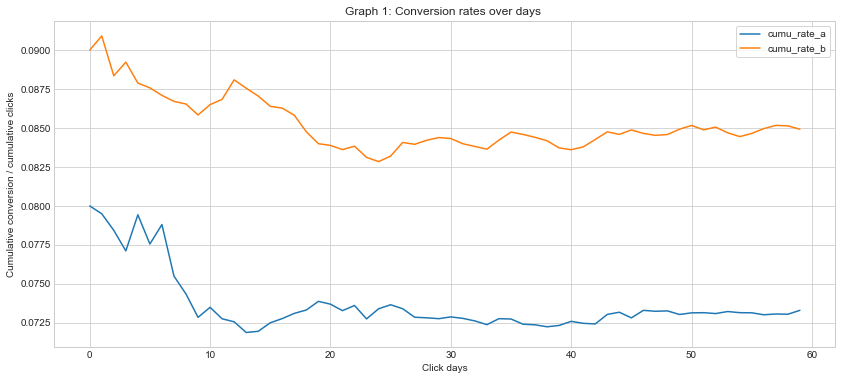

In [29]:
fig, ax = plt.subplots(figsize=(14,6))
plt.style.use('seaborn-whitegrid')
ax.plot(conv_days['click_day'], conv_days['cumu_rate_a'], label = 'cumu_rate_a')
ax.plot(conv_days['click_day'],conv_days['cumu_rate_b'], label = 'cumu_rate_b')
ax.set_title('Graph 1: Conversion rates over days ')
ax.set_ylabel('Cumulative conversion / cumulative clicks')
ax.set_xlabel('Click days')
legend = ax.legend(loc = 'best',ncol=1,frameon = True)
plt.show()

###### Overall campaign data 

In [30]:
campaign = pd.DataFrame({'Campaign_ID':['A','B'], 'Clicks': [conv_days.click_a.sum(),
                                                               conv_days.click_b.sum()],
                        'Conversion': [conv_days.conv_a.sum(),conv_days.conv_b.sum()],
                        'Conversion_pct': [conv_days.conv_a.sum()/conv_days.click_a.sum(),
                                           conv_days.conv_b.sum()/conv_days.click_b.sum()]})
campaign.head()

,Campaign_ID,Clicks,Conversion,Conversion_pct
0,A,5921,434,0.073298
1,B,5864,498,0.084925


We are looking at the stats after 59 days. How did we arrive at the number of days? Explaination below

In [69]:
click_day = 50
success_a = conv_days.loc[conv_days['click_day'] == click_day]['cumu_conv_a'].values[0]
size_a = conv_days.loc[conv_days['click_day'] == click_day]['cumu_click_a'].values[0]
success_b = conv_days.loc[conv_days['click_day'] == click_day]['cumu_conv_b'].values[0]
size_b = conv_days.loc[conv_days['click_day'] == click_day]['cumu_click_b'].values[0]


prop_a = success_a / size_a
prop_b = success_b / size_b
print(prop_a,prob_b)

0.07313670785173376 0.095


###### Frequentist Approach

This will enable to take into account the business constraints for how long an experiment should run vs what is the minimum effect size we want to detect

Math to business translation for effect sizes:

Usually effect size (also known as cohen's d) is a standardize difference of means in two group that we want to detect. It is represented by equation:

$$effect\ size = (mean\ of\ experiment\ group\ - mean\ of\ control\ group)/\ Standard\ deviation $$

But how does this translate when we are talking about proportions? For these purposes, we have Cohen's h (for proportions)

$$ℎ=2∗𝑎𝑟𝑐𝑠𝑖𝑛(√𝑝_1)−2∗𝑎𝑟𝑐𝑠𝑖𝑛(√𝑝_2)$$

To continue our LinkedIn example: The Product manager knows or has agreed on a base conversion rate of 8%. Now he wants to detect if there is a true increase in conversion rate (we are referring it to as minimum difference) by 1.5% points

**Below is how this requirement would translate into maths**

In [86]:
import math

prob_a = 0.08
min_diff = 0.012
prob_b = prob_a + min_diff

arsine_transformation_p1 = 2*math.asin(np.sqrt(prob_a))
arsine_transformation_p2 = 2*math.asin(np.sqrt(prob_b))

cohens_h = abs(arsine_transformation_p1-arsine_transformation_p2)
print('To detect an increase in 1.2 percentage points in conversion rate, the corresponding effect size to be used for \nsample size estimation is {:.3f}'.format(cohens_h))


To detect an increase in 1.2 percentage points in conversion rate, the corresponding effect size to be used for 
sample size estimation is 0.043


###### Sample size Curve

Below is a sample size vs cohen's d graph. This indicates that the to detect smaller effect size larger number of sample sizes are required and it increases exponentially if we want to detect smaller differences

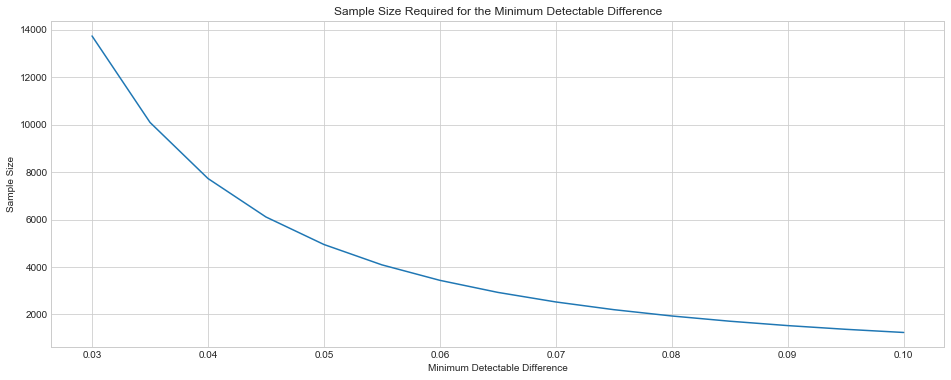

In [39]:
#Power curve

# calculate the the required sample size
# for a range of minimum detectable difference
sample_sizes = []
effect_sizes = np.arange(0.03, 0.1, 0.005)
for effect in effect_sizes:
    sample_size = TTestIndPower().solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha, alternative = 'larger')
    sample_sizes.append(sample_size)

fig, ax = plt.subplots(figsize=(16,6))
ax.plot(effect_sizes, sample_sizes)
ax.set_title('Sample Size Required for the Minimum Detectable Difference')
ax.set_ylabel('Sample Size')
ax.set_xlabel('Minimum Detectable Difference')
#ax.set_tight_layout()
plt.show()


In [88]:
# Assuming the minimum detectable difference as 5% i.e. effect size = 0.046

#assumptions for type I error = 5% alpha
#assumpions for type II error = 20% beta
# Power = 80% (1-type II error)

#Power and sample size calculations

# estimate sample size via power analysis
from statsmodels.stats.power import TTestIndPower
# parameters for power analysis
effect = 0.046
alpha = 0.05
power = 0.8
# perform power analysis
analysis = TTestIndPower()
result = TTestIndPower().solve_power(effect, power=power, nobs1=None, ratio=1.0, alpha=alpha, alternative = 'larger')
print('Sample Size for one group: %.3f' % result)

Sample Size for one group: 5844.303


###### Power curve

Tthe below plot will help us understand what is the trade off between power and sample size

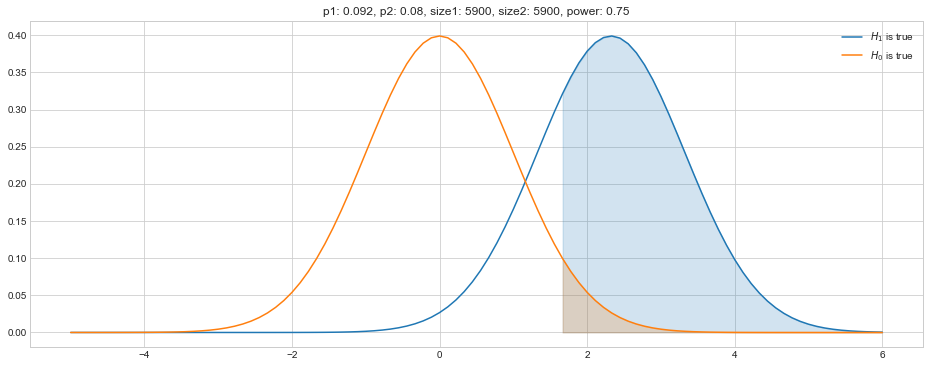

In [91]:
#H0 and H1 distribution plot with power

def plot_power(min_diff, prob_b, size_a, size_b, significance = 0.05):
    """illustrating power through a one-tailed hypothesis test"""
    
    # obtain the z-score for the minimum detectable
    # difference using proportion_ztest
    prob_a = prob_b + min_diff
    count_a = size_a * prob_a
    count_b = size_b * prob_b
    counts = np.array([count_a, count_b])
    nobs = np.array([size_a, size_b])
    zscore, _ = proportions_ztest(counts, nobs, alternative = 'larger')

    # distribution for the null hypothesis, h0
    # and alternative hypothesis, h1
    h0 = stats.norm(loc = 0, scale = 1)
    h1 = stats.norm(loc = zscore, scale = 1)

    # points that are greater than the zscore for the
    # specified significance level
    x = np.linspace(-5, 6, num = 100)
    threshold = h0.ppf(1 - significance)
    mask = x > threshold
    
    # power is the area after the threshold, i.e.
    # 1 - the cumulative distribution function of that point
    power = np.round(1 - h1.cdf(threshold), 2)

    hypotheses = [h1, h0]
    labels = ['$H_1$ is true', '$H_0$ is true']
    fig, ax = plt.subplots(figsize=(16,6))
    for hypothesis, label in zip(hypotheses, labels):
        y = hypothesis.pdf(x)
        line = plt.plot(x, y, label = label)  
        plt.fill_between(x = x[mask], y1 = 0.0, y2 = y[mask],
                         alpha = 0.2, color = line[0].get_color())
    title = 'p1: {}, p2: {}, size1: {}, size2: {}, power: {}'
    ax.set_title(title.format(prob_a, prob_b, size_a, size_b, power))
    ax.legend()
    #ax.tight_layout()
    plt.show()

# 
prob_b = 0.08
min_diff = 0.012
size_a = 5900
size_b = 5900

plot_power(min_diff, prob_b, size_a, size_b)
#plot_power(0.05, 0.08, 2500, 2500)

###### Experiment run time

In [83]:
experiment_runtime = min(conv_days.loc[(conv_days['cumu_click_b']> result ) & (conv_days['cumu_click_b'] > result)].click_day)
print('We have to run the experiment for minimum of %.f days' %experiment_runtime)

We have to run the experiment for minimum of 59 days


###### Measurement of the results after 50 days

In [57]:
def two_proprotions_test(success_a, size_a, success_b, size_b):
    """
    A/B test for two proportions;
    given a success a trial size of group A and B compute
    its zscore and pvalue
    
    Parameters
    ----------
    success_a, success_b : int
        Number of successes in each group
        
    size_a, size_b : int
        Size, or number of observations in each group
    
    Returns
    -------
    zscore : float
        test statistic for the two proportion z-test

    pvalue : float
        p-value for the two proportion z-test
    """
    prop_a = success_a / size_a
    prop_b = success_b / size_b
    prop_pooled = (success_a + success_b) / (size_a + size_b)
    var = prop_pooled * (1 - prop_pooled) * (1 / size_a + 1 / size_b)
    zscore = np.abs(prop_b - prop_a) / np.sqrt(var)
    one_side = 1 - stats.norm(loc = 0, scale = 1).cdf(zscore)
    pvalue = one_side * 2
    return zscore, pvalue

click_day = 50
conversions_a = conv_days.loc[conv_days['click_day'] == click_day]['cumu_conv_a'].values[0]
clicks_a = conv_days.loc[conv_days['click_day'] == click_day]['cumu_click_a'].values[0]
conversions_b = conv_days.loc[conv_days['click_day'] == click_day]['cumu_conv_b'].values[0]
clicks_b = conv_days.loc[conv_days['click_day'] == click_day]['cumu_click_b'].values[0]

#zscore, pvalue = two_proprotions_test(success_a, size_a, success_b, size_b)
zscore, pvalue = two_proprotions_test(conversions_a, clicks_a, conversions_b, clicks_b)
print('zscore = {:.3f}, pvalue = {:.3f}'.format(zscore, pvalue))


zscore = 2.230, pvalue = 0.026


In [58]:
def two_proprotions_confint(success_a, size_a, success_b, size_b, significance = 0.05):
    """
    A/B test for two proportions;
    given a success a trial size of group A and B compute
    its confidence interval;
    
    Parameters
    ----------
    success_a, success_b : int
        Number of successes in each group
        
    size_a, size_b : int
        Size, or number of observations in each group
        
    significance : float, default 0.05
        Often denoted as alpha. Governs the chance of a false positive.
        A significance level of 0.05 means that there is a 5% chance of
        a false positive. In other words, our confidence level is
        1 - 0.05 = 0.95
        
    Returns
    -------
    prop_diff : float
        Difference between the two proportion
    
    confint : 1d ndarray
        Confidence interval of the two proportion test
    """
    prop_a = success_a / size_a
    prop_b = success_b / size_b
    var = prop_a * (1 - prop_a) / size_a + prop_b * (1 - prop_b) / size_b
    se = np.sqrt(var)
    
    # z critical value
    confidence = 1 - significance
    z = stats.norm(loc = 0, scale = 1).ppf(confidence + significance / 2)

    # standard formula for the confidence interval
    # point-estimtate +- z * standard-error
    prop_diff = prop_b - prop_a
    confint = prop_diff + np.array([-1, 1]) * z * se
    return prop_diff, confint

prop_diff, confint = two_proprotions_confint(conversions_a, clicks_a, conversions_b, clicks_b)
print('estimate difference:', prop_diff)
print('confidence interval:', confint)


estimate difference: 0.012029225774815619
confidence interval: [0.001459   0.02259945]


##### Bayesian Approach

###### Considering Historical data

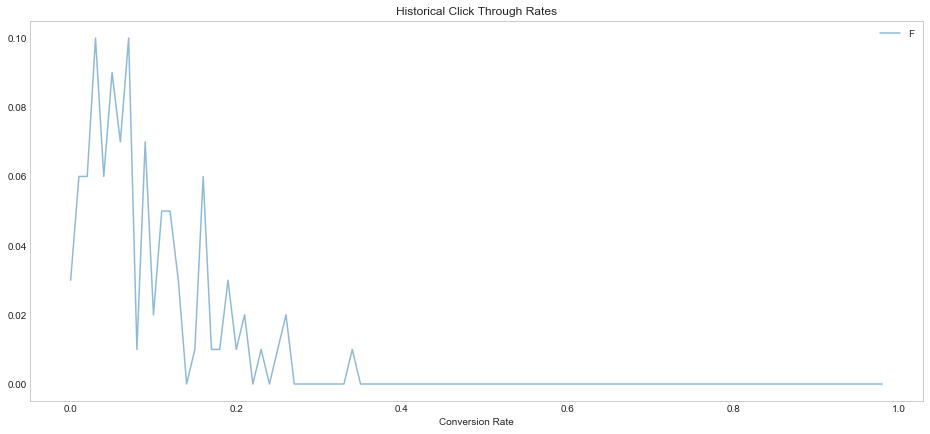

In [9]:
# Historical data on the conversion rates
plt.rcParams['figure.figsize'] = (16, 7)

true_a = 2.06 #alpha parameter of the beta distribution from which we are generating campaigns
true_b = 20 #beta parameter of the beta distribution from which we are generating campaigns

#number of marketing campaigns
N = 100

#randomly generate "true" click through rate for each campaign
p = np.random.beta(true_a,true_b, size=N)

#randomly pick the number of impressions for each campaign
impressions = np.random.randint(1, 10000, size=N)

#sample number of clicks for each campaign
clicks = np.random.binomial(impressions, p).astype(float)
click_through_rates = clicks / impressions

#plot the histogram of previous click through rates with the evidence
#of the new campaign
f, ax = plt.subplots(1)

zero_to_one = [j/100. for j in range(100)]
counts, bins = np.histogram(click_through_rates
                            , bins=zero_to_one)
counts = counts / 100.
ax.plot(bins[:-1],counts, alpha = .5)
#line1, line2, line3 = ax.lines
ax.legend('Frequency of Theta Historically'
                          )
ax.set_xlabel("Conversion Rate")
ax.grid()
ax.set_title("Historical Click Through Rates")
plt.show()

###### Estimating beta prior

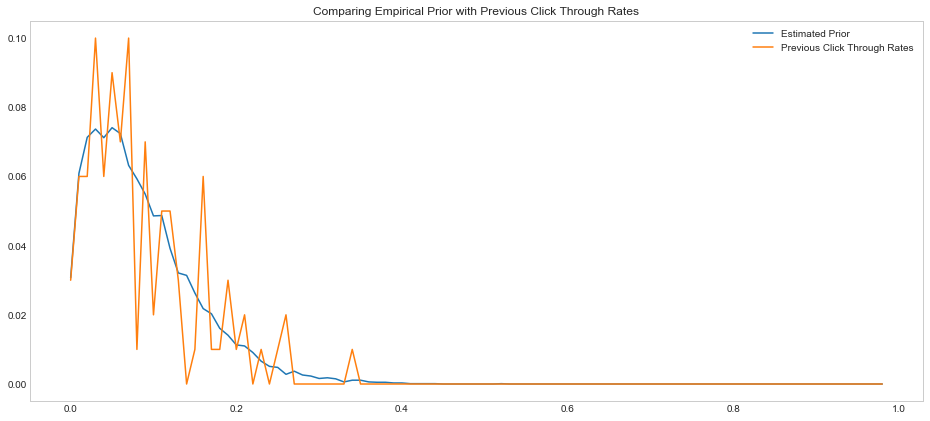

In [13]:
prior_parameters = beta.fit(click_through_rates
                            , floc = 0
                            , fscale = 1)
#extract a,b from fit
alpha_prior, beta_prior = prior_parameters[0:2]

#define prior distribution sample from prior
prior_distribution = beta(alpha_prior, beta_prior)
#get histogram of samples
prior_samples = prior_distribution.rvs(10000)
#get histogram of samples
fit_counts, bins = np.histogram(prior_samples
                                , zero_to_one)
#normalize histogram
fit_counts = list(map(lambda x: float(x)/fit_counts.sum()
                         , fit_counts))

#plot
f, ax = plt.subplots(1)
ax.plot(bins[:-1], fit_counts)
hist_ctr, bins = np.histogram(click_through_rates
                              , zero_to_one)
hist_ctr = list(map(lambda x: float(x)/hist_ctr.sum()
                              , hist_ctr))
ax.plot(bins[:-1], hist_ctr)
estimated_prior, previous_click_through_rates = ax.lines
ax.legend((estimated_prior, previous_click_through_rates)
          ,('Estimated Prior'
            , 'Previous Click Through Rates'))
ax.grid()
ax.set_title("Comparing Empirical Prior with Previous Click Through Rates")
plt.show()

###### Finding a posterior distribution for a beta binomial conjugate prior

In [17]:
#posterior distribution
def posterior(alpha_prior, beta_prior, variant, click_day):    
    
    alpha_prior = alpha_prior
    beta_prior = beta_prior
    
    if variant == 'A':  
        conversions_a = conv_days.loc[conv_days['click_day'] == click_day]['cumu_conv_a'].values[0]
        clicks_a = conv_days.loc[conv_days['click_day'] == click_day]['cumu_click_a'].values[0]
        alpha_posterior = alpha_prior+conversions_a
        beta_posterior = beta_prior + clicks_a - conversions_a
        posterior_beta_distri = stats.beta(alpha_posterior, beta_posterior)
        print("alpha and beta for posterior dissribution of variant 'A' will be ", 
              alpha_posterior, "and" , beta_posterior)

    elif variant == 'B':
        conversions_b = conv_days.loc[conv_days['click_day'] == click_day]['cumu_conv_b'].values[0]
        clicks_b = conv_days.loc[conv_days['click_day'] == click_day]['cumu_click_b'].values[0]
        alpha_posterior = alpha_prior+conversions_b
        beta_posterior = beta_prior + clicks_b - conversions_b
        posterior_beta_distri = stats.beta(alpha_posterior, beta_posterior)
        print("alpha and beta for posterior dissribution of variant 'B' will be ", 
              alpha_posterior, "and" , beta_posterior)
        
    else:
        print("pass third argumet as as variant you want i.e. 'A' or 'B' ")
    
    return posterior_beta_distri

###### Note:

Function to find out difference between pdfs of two beta distribution based on John Cook's solution

This could also be done by Monte Carlo Simulations

In [16]:
from math import lgamma
from numba import jit

#defining the functions used
@jit
def h(a, b, c, d):
    num = lgamma(a + c) + lgamma(b + d) + lgamma(a + b) + lgamma(c + d)
    den = lgamma(a) + lgamma(b) + lgamma(c) + lgamma(d) + lgamma(a + b + c + d)
    return np.exp(num - den)
@jit
def g0(a, b, c):    
    return np.exp(lgamma(a + b) + lgamma(a + c) - (lgamma(a + b + c) + lgamma(a)))
@jit
def hiter(a, b, c, d):
    while d > 1:
        d -= 1
        yield h(a, b, c, d) / d
def g(a, b, c, d):
    return g0(a, b, c) + sum(hiter(a, b, c, d))
def calc_prob_between(beta1, beta2):
    return g(beta1.args[0], beta1.args[1], beta2.args[0], beta2.args[1])

Calculating Posterior from beta binomial prior based on a daily basis and estimating probabilities

alpha and beta for posterior dissribution of variant 'A' will be  11.6880734621692 and 131.52749278430696
alpha and beta for posterior dissribution of variant 'B' will be  10.6880734621692 and 107.52749278430696
alpha and beta for posterior dissribution of variant 'A' will be  20.6880734621692 and 236.52749278430696
alpha and beta for posterior dissribution of variant 'B' will be  15.6880734621692 and 156.52749278430696
alpha and beta for posterior dissribution of variant 'A' will be  25.6880734621692 and 298.52749278430696
alpha and beta for posterior dissribution of variant 'B' will be  23.6880734621692 and 243.52749278430696
alpha and beta for posterior dissribution of variant 'A' will be  32.6880734621692 and 387.52749278430696
alpha and beta for posterior dissribution of variant 'B' will be  30.6880734621692 and 312.52749278430696
alpha and beta for posterior dissribution of variant 'A' will be  40.6880734621692 and 468.52749278430696
alpha and beta for posterior dissribution of v

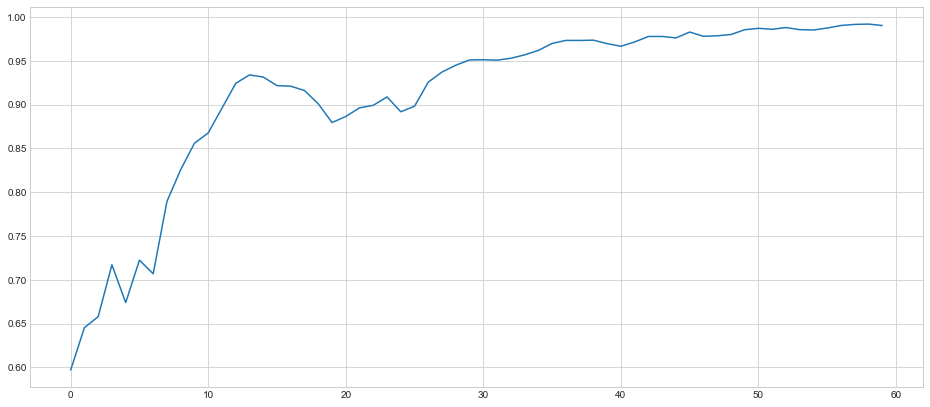

In [18]:
daily_cumu_prob = []
for day in range(60):
    a = posterior(alpha_prior,beta_prior,'A',day)
    b = posterior(alpha_prior,beta_prior,'B',day)
    prob=calc_prob_between(b,a)
    daily_cumu_prob.append(prob) 

plt.plot(range(60), daily_cumu_prob)

In [28]:
#After 30th Day
day1 = 30
a1 = posterior(alpha_prior,beta_prior,'A',day1)
b1 = posterior(alpha_prior,beta_prior,'B',day1)

lift1=(b1.mean()-a1.mean())/a1.mean()
#calculating the probability for Test to be better than Control
prob1=calc_prob_between(b1,a1)

day2 = 59
a2 = posterior(alpha_prior,beta_prior,'A',day2)
b2 = posterior(alpha_prior,beta_prior,'B',day2)

lift2=(b2.mean()-a2.mean())/a2.mean()
#calculating the probability for Test to be better than Control
prob2=calc_prob_between(b2,a2)

print("After day 30: Lift from variant B is {0:.2f}%, and probability of B being better than A based on data is {1:.2f}%".format(lift1*100, prob1*100))
print("After day 60: Lift from variant B is {0:.2f}%, and probability of B being better than A based on data is {1:.2f}%".format(lift2*100, prob2*100))

alpha and beta for posterior dissribution of variant 'A' will be  231.6880734621692 and 2942.527492784307
alpha and beta for posterior dissribution of variant 'B' will be  249.6880734621692 and 2709.527492784307
alpha and beta for posterior dissribution of variant 'A' will be  435.6880734621692 and 5503.527492784307
alpha and beta for posterior dissribution of variant 'B' will be  499.6880734621692 and 5382.527492784307
After day 30: Lift from variant B is 15.60%, and probability of B being better than A based on data is 95.12%
After day 60: Lift from variant B is 15.80%, and probability of B being better than A based on data is 99.03%


Monte Carlo simulation for the same

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 41000/41000 [00:49<00:00, 835.66draws/s]
The number of effective samples is smaller than 25% for some parameters.


simulation for day 1 complete


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 41000/41000 [00:47<00:00, 855.74draws/s]
The number of effective samples is smaller than 25% for some parameters.


simulation for day 2 complete


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 41000/41000 [00:55<00:00, 739.72draws/s]
The number of effective samples is smaller than 25% for some parameters.


simulation for day 3 complete


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 41000/41000 [01:08<00:00, 596.04draws/s]
The number of effective samples is smaller than 25% for some parameters.


simulation for day 4 complete


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 41000/41000 [00:52<00:00, 784.24draws/s]
The number of effective samples is smaller than 25% for some parameters.


simulation for day 5 complete


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 41000/41000 [00:56<00:00, 725.12draws/s]
The number of effective samples is smaller than 25% for some parameters.


simulation for day 6 complete


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 41000/41000 [00:54<00:00, 753.47draws/s]
The number of effective samples is smaller than 25% for some parameters.


simulation for day 7 complete


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 41000/41000 [00:59<00:00, 686.35draws/s]
The number of effective samples is smaller than 25% for some parameters.


simulation for day 8 complete


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 41000/41000 [01:01<00:00, 661.90draws/s]
The number of effective samples is smaller than 25% for some parameters.


simulation for day 9 complete


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 41000/41000 [00:58<00:00, 701.39draws/s]
The number of effective samples is smaller than 25% for some parameters.


simulation for day 10 complete


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 41000/41000 [01:00<00:00, 679.60draws/s]
The number of effective samples is smaller than 25% for some parameters.


simulation for day 11 complete


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 41000/41000 [00:53<00:00, 763.24draws/s]
The number of effective samples is smaller than 25% for some parameters.


simulation for day 12 complete


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 41000/41000 [00:55<00:00, 744.45draws/s]
The number of effective samples is smaller than 25% for some parameters.


simulation for day 13 complete


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 41000/41000 [00:55<00:00, 745.23draws/s]
The number of effective samples is smaller than 25% for some parameters.


simulation for day 14 complete


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 41000/41000 [00:49<00:00, 835.59draws/s]
The number of effective samples is smaller than 25% for some parameters.


simulation for day 15 complete


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 41000/41000 [00:55<00:00, 738.24draws/s]
The number of effective samples is smaller than 25% for some parameters.


simulation for day 16 complete


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 41000/41000 [00:55<00:00, 733.92draws/s]
The number of effective samples is smaller than 25% for some parameters.


simulation for day 17 complete


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 41000/41000 [00:58<00:00, 695.64draws/s]
The number of effective samples is smaller than 25% for some parameters.


simulation for day 18 complete


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 41000/41000 [01:10<00:00, 583.13draws/s]
The number of effective samples is smaller than 25% for some parameters.


simulation for day 19 complete


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 41000/41000 [00:50<00:00, 809.24draws/s]
The number of effective samples is smaller than 25% for some parameters.


simulation for day 20 complete


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 41000/41000 [00:58<00:00, 703.23draws/s]
The number of effective samples is smaller than 25% for some parameters.


simulation for day 21 complete


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 41000/41000 [00:54<00:00, 757.31draws/s]
The number of effective samples is smaller than 25% for some parameters.


simulation for day 22 complete


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 41000/41000 [01:05<00:00, 626.74draws/s]
The number of effective samples is smaller than 25% for some parameters.


simulation for day 23 complete


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 41000/41000 [01:05<00:00, 629.01draws/s]
The number of effective samples is smaller than 25% for some parameters.


simulation for day 24 complete


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 41000/41000 [01:05<00:00, 623.26draws/s]
The number of effective samples is smaller than 25% for some parameters.


simulation for day 25 complete


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 41000/41000 [01:03<00:00, 644.40draws/s]
The number of effective samples is smaller than 25% for some parameters.


simulation for day 26 complete


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 41000/41000 [00:54<00:00, 755.72draws/s]
The number of effective samples is smaller than 10% for some parameters.


simulation for day 27 complete


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 41000/41000 [01:17<00:00, 527.04draws/s]
The number of effective samples is smaller than 10% for some parameters.


simulation for day 28 complete


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 41000/41000 [00:48<00:00, 850.60draws/s]
The number of effective samples is smaller than 25% for some parameters.


simulation for day 29 complete


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 41000/41000 [00:46<00:00, 878.32draws/s]
The number of effective samples is smaller than 10% for some parameters.


simulation for day 30 complete


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 41000/41000 [01:14<00:00, 552.58draws/s]
The number of effective samples is smaller than 10% for some parameters.


simulation for day 31 complete


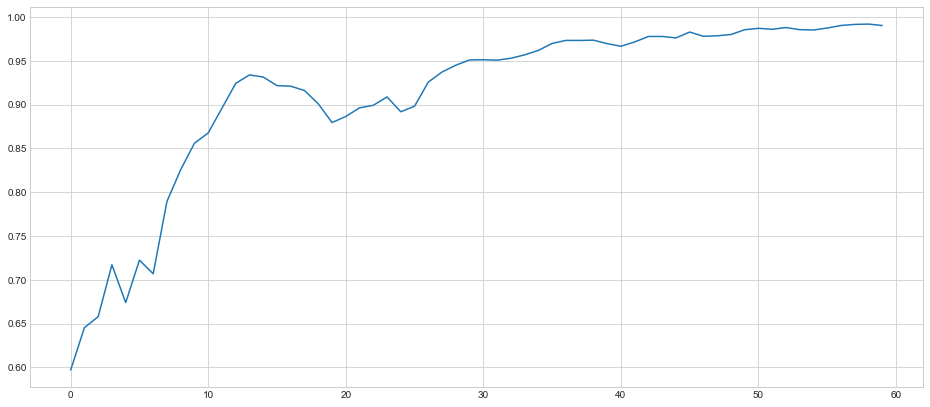

In [34]:
daily_cumu_prob_mcmc = []
x = 0 #counter

for click_day in range(31):
    conversions_a = conv_days.loc[conv_days['click_day'] == click_day]['cumu_conv_a'].values[0]
    clicks_a = conv_days.loc[conv_days['click_day'] == click_day]['cumu_click_a'].values[0]
    conversions_b = conv_days.loc[conv_days['click_day'] == click_day]['cumu_conv_b'].values[0]
    clicks_b = conv_days.loc[conv_days['click_day'] == click_day]['cumu_click_b'].values[0]

    x += 1
    with pm.Model() as model:
        
        p_A = pm.Beta("p_A", alpha_prior, beta_prior)
        p_B = pm.Beta("p_B",alpha_prior, beta_prior)
        
        # Define the deterministic delta function. This is our unknown of interest.
        delta = pm.Deterministic("delta", p_A - p_B)
    
        
        # Set of observations, in this case we have two observation datasets.
        obs_A = pm.Binomial("obs_A", p=p_A, n = clicks_a, observed=conversions_a)
        obs_B = pm.Binomial("obs_B", p=p_B, n = clicks_b, observed=conversions_b)
    
        # To be explained in chapter 3.
        step = pm.Metropolis()
        trace = pm.sample(20000, step=step, progressbar = True)
        burned_trace=trace[1000:]
        
       
    p_A_samples = burned_trace["p_A"]
    p_B_samples = burned_trace["p_B"]
    delta_samples = burned_trace["delta"]
    
    daily_cumu_prob_mcmc.append(np.mean(delta_samples > 0))
    print("simulation for day {0} complete".format(x))
    
plt.plot(range(60), daily_cumu_prob)   

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB78B4EA20>,
      dtype=object)

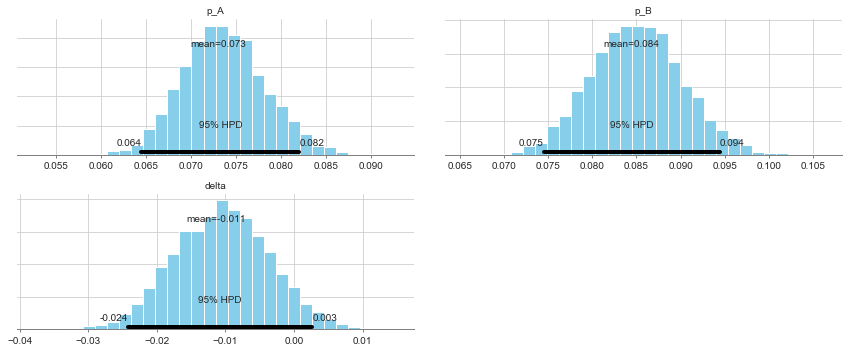

In [38]:
#plt.plot(range(60), daily_cumu_prob)   
pm.plot_posterior(burned_trace, color='#87ceeb')

Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [p_B]
>Metropolis: [p_A]
Sampling 2 chains: 100%|█████████████████████████████████████████████████████| 41000/41000 [00:48<00:00, 841.38draws/s]
The number of effective samples is smaller than 10% for some parameters.


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DB7BD7D6A0>,
      dtype=object)

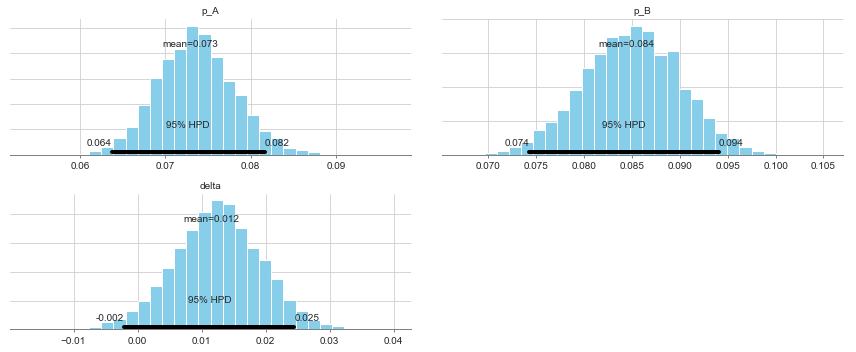

In [40]:
with pm.Model() as model:
        
        p_A = pm.Beta("p_A", alpha_prior, beta_prior)
        p_B = pm.Beta("p_B",alpha_prior, beta_prior)
        
        # Define the deterministic delta function. This is our unknown of interest.
        delta = pm.Deterministic("delta", p_B - p_A)
    
        
        # Set of observations, in this case we have two observation datasets.
        obs_A = pm.Binomial("obs_A", p=p_A, n = clicks_a, observed=conversions_a)
        obs_B = pm.Binomial("obs_B", p=p_B, n = clicks_b, observed=conversions_b)
    
        # To be explained in chapter 3.
        step = pm.Metropolis()
        trace = pm.sample(20000, step=step, progressbar = True)
        burned_trace=trace[1000:]
        
       
        p_A_samples = burned_trace["p_A"]
        p_B_samples = burned_trace["p_B"]
        delta_samples = burned_trace["delta"]

pm.plot_posterior(burned_trace, color='#87ceeb')

In [41]:
pm.summary(trace)

C:\Users\chaitanya.srivastava\AppData\Local\Continuum\anaconda3\lib\site-packages\pymc3\stats.py:982: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
p_A,0.072903,0.004561,0.000067,0.063690,0.081588,4684.576537,0.999979
p_B,0.084412,0.005057,0.000087,0.074387,0.094132,3922.992215,0.999994
delta,0.011509,0.006762,0.000116,-0.002086,0.024589,4179.297986,0.999979
